In [27]:
#Import the libraries
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import MNIST Dataset for  training
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [29]:

# tf Sequential model with 28x28 dimensions
tf.random.set_seed(34)
model = Sequential(
    [
        tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        Dense(units = 40, activation = 'sigmoid', name="l0"),
        Dense(units = 25, activation = 'sigmoid', name="l1"),
        Dense(units = 10, activation = 'softmax', name="l2")
    ], name="my_model"
)
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l0 (Dense)                      │ (None, 40)             │        31,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l1 (Dense)                      │ (None, 25)             │         1,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,685 (127.68 KB)

 Trainable params: 32,685 (127.68 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Load the model, if already trained
model = tf.keras.models.load_model('model/my_model.keras')

In [ ]:
# Training, using ADAM optimizer 
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
)

history = model.fit(
    train_X,train_y,
    epochs=80,
    validation_data=(test_X,test_y),
)

In [ ]:
# save the trained model

model.save_weights('model/my_model.weights.h5')
model.save('model/my_model.keras')

In [25]:
# Evaluating the model from test set

results = model.evaluate(test_X, test_y, batch_size=256)
predictions = model.predict(test_X[:test_y.shape[0]])

j = 0 
count=0
for i in predictions:
    if(np.argmax(i)!=test_y[j]):
        count+=1
    j+=1
print(f"\n{count}/{test_y.shape[0]} Wrong Predictions,\n{test_y.shape[0]-count}/{test_y.shape[0]} Right Predictions,\nLoss = {results},")
print(f'Accuracy = {100*(test_y.shape[0]-count)/test_y.shape[0]}%')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.1968
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step

511/10000 Wrong Predictions,
9489/10000 Right Predictions,
Loss = 0.17646272480487823,
Accuracy = 94.89%


In [ ]:
# Plot Loss function with epochs

fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], color='b', label="Training Loss")
ax.plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax.legend(loc='best', shadow=True)

plt.xlabel('No. of epochs')
plt.ylabel('Loss')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


 Predictions = [[5.8229096e-05 1.9268773e-04 9.7869611e-01 1.9495709e-02 4.8984757e-06
  1.9693643e-05 1.7388978e-05 1.1907776e-03 3.2249186e-04 2.0940902e-06]]
 Largest probability: 2



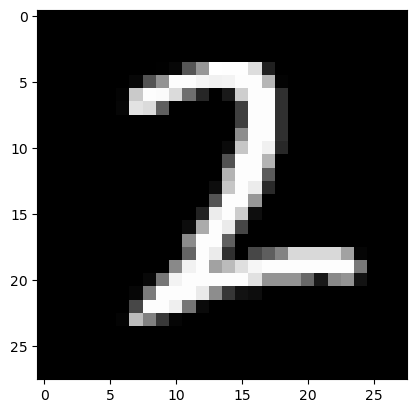

In [10]:
#Predicting a value from the test set (MNIST)

example = 1336

image = test_X[example]
plt.imshow(test_X[example], cmap=plt.get_cmap('gray'))

prediction = model.predict(image.reshape(1,28,28))  # prediction

print(f"\n\n Predictions = {prediction}")
print(f" Largest probability: {np.argmax(prediction)}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Predicted Value = 6



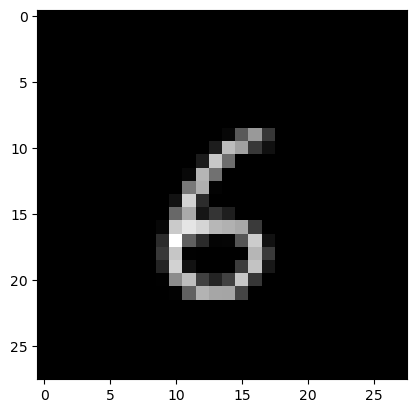

In [219]:
#Predicting from own data
path = 'test_images/6.png'

image = tf.keras.utils.load_img(
            path,
            color_mode="grayscale",
            interpolation="nearest",
            keep_aspect_ratio=False,
        )

image = image.resize([28,28])
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr[:,:,0]

plt.imshow(input_arr, cmap=plt.get_cmap('gray'))

arr = input_arr.reshape(1,28,28)
predictions = model.predict(arr)
print(f"\nPredicted Value = {np.argmax(predictions)}\n")